In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
df = pd.read_csv(r'Housing.csv')

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
print(df.shape)
print('\n')
print(df.isnull().sum())

(545, 13)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


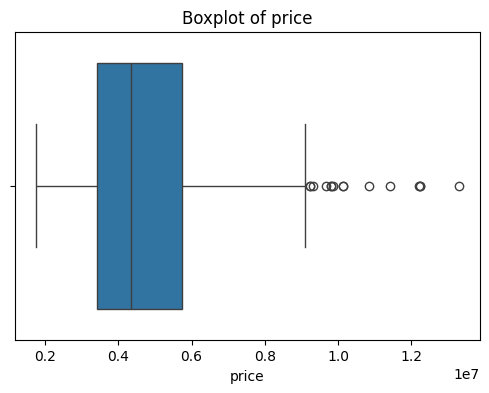

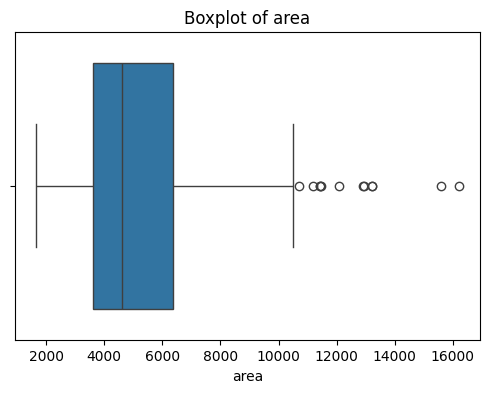

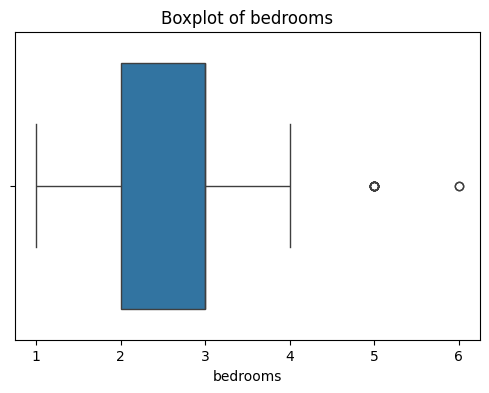

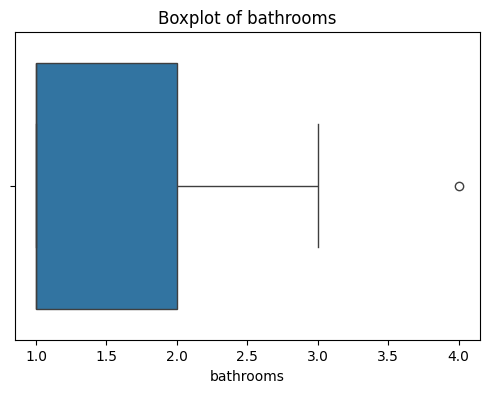

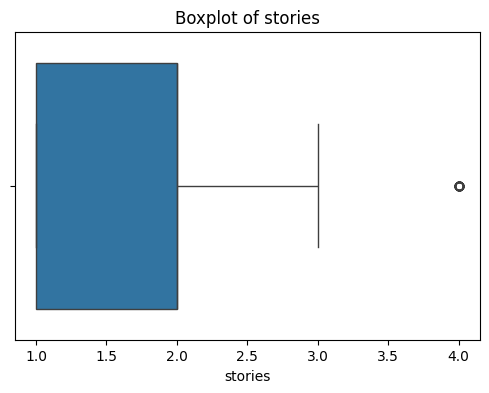

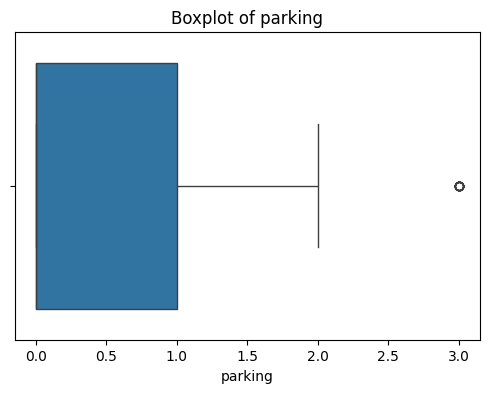

In [19]:
int_cols = df.select_dtypes(include=['int']).columns

for col in int_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x= df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

 

In [20]:
df.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [21]:
int_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in int_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mean_val = int(df[col].mean())
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean_val
    df[col] = df[col].astype(int)


In [22]:
from sklearn.preprocessing import OneHotEncoder

obj_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[obj_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(obj_cols)).astype(int)

# Drop original object columns and concatenate encoded columns
df = df.drop(columns=obj_cols)
df = pd.concat([df, encoded_df], axis=1)

# df is now preprocessed and ready
print(df.head())


     price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  4766729  7420         4          2        3        2             1   
1  4766729  8960         4          1        1        0             1   
2  4766729  9960         3          2        2        2             1   
3  4766729  7500         4          2        2        0             1   
4  4766729  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0             1        

Text(0, 0.5, 'price')

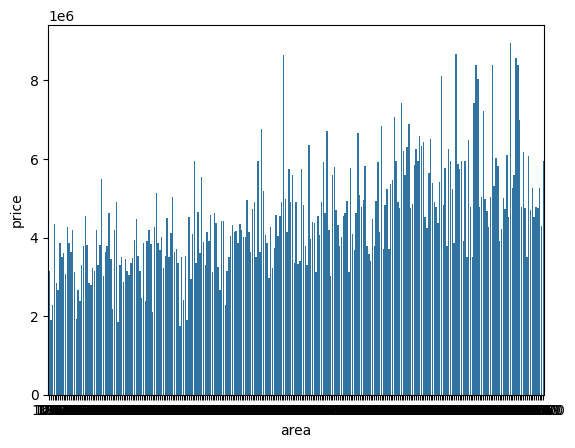

In [ ]:
#area can be binned and give better output will fix this in future

fig, ax = plt.subplots()
sns.barplot(data=df, y='price', x='area', errorbar=None)
ax.set_xlabel('area')
ax.set_ylabel('price')


<Axes: >

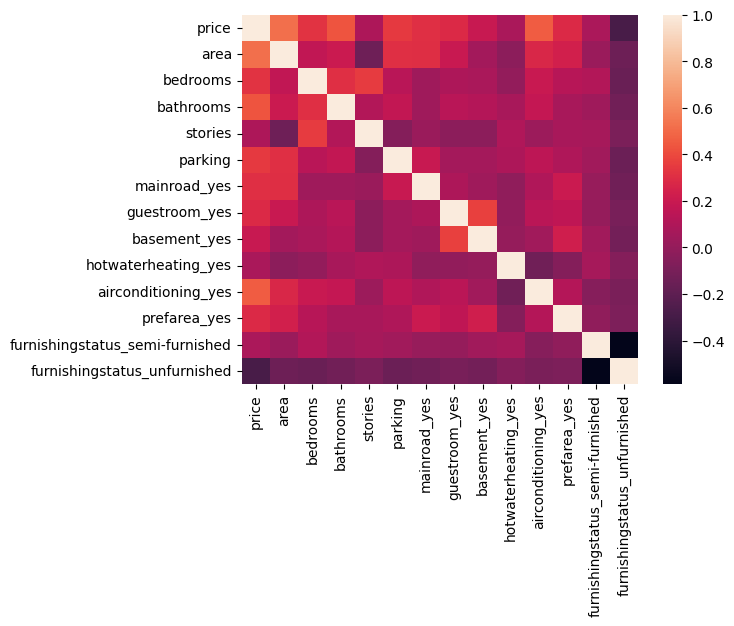

In [38]:
sns.heatmap(data=df.corr())

In [39]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [40]:
X = df.drop(columns=['price','furnishingstatus_unfurnished','furnishingstatus_semi-furnished','hotwaterheating_yes','basement_yes','stories'])
y = df['price']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

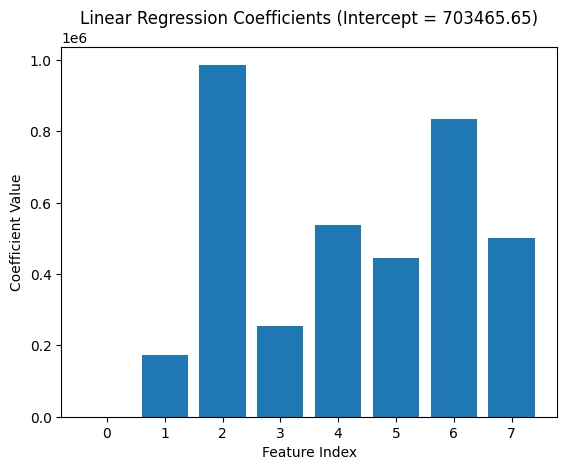

MAE: 1023421.8300, MSE: 1711896826317.8096, R2 Score: 0.4236


In [48]:
intercept = model.intercept_
coefficients = model.coef_

plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title(f'Linear Regression Coefficients (Intercept = {intercept:.2f})')
plt.show()

print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}')
